# Værdien af statens aktier i DONG under de to forskellige aftaler

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *

Dette er statens nuværende andel.

In [3]:
stat_andel = 0.81

## PensionDanmark aftalen

Payoff til staten fra PensionDanmark-aftalen som funktion af sand værdi, indskud og realiseret afkast.

Vores output er:
* Den betaling staten skal foretage til investoren
* Værdien af statens aktiebeholdning

Investorens option har en strike på det oprindelige indskud forrentet med en fast rente. 

In [4]:
def pendk(sand, indskud, premoney, n, g, r):
    # Samlet værdi på DONG
    værdi_dong = pow(1 + r, n) * (sand + indskud)
    
    # Værdi for PensionDanmark hvis de udnytter optionen
    værdi_pendk_option = pow(1 + g, n) * indskud
    # Værdi for PensionDanmark hvis de ikke udnytter optionen og beholder aktierne
    værdi_pendk_aktie = (indskud / (premoney + indskud)) * værdi_dong
    
    if værdi_pendk_option > værdi_pendk_aktie:
        # PensionDanmark udnytter optionen
        værdi_pendk = værdi_pendk_option
        
        # Betaling som staten foretager til PensionDanmark
        betaling_pendk_stat = værdi_pendk_option
        
        # Staten overtager PensionDanmarks andel, foretager betalingen til PensionDanmark
        værdi_pendk_stat_aktier = værdi_dong * (premoney * stat_andel + indskud) / (premoney + indskud)
        værdi_pendk_stat = værdi_pendk_stat_aktier - betaling_pendk_stat
    else:
        værdi_pendk = værdi_pendk_aktie
        værdi_pendk_stat_aktier = værdi_dong * premoney * stat_andel / (premoney + indskud)
        værdi_pendk_stat = værdi_pendk_stat_aktier
        betaling_pendk_stat = 0.0
    
    return Series({
        'værdi_pendk': værdi_pendk,
        'værdi_pendk_stat': værdi_pendk_stat,
        'betaling_pendk_stat': betaling_pendk_stat,
        'værdi_pendk_stat_aktier': værdi_pendk_stat_aktier
    })

En lille test.

In [5]:
pendk(30, 10, 40, 4, .02, .2)

betaling_pendk_stat         0.000000
værdi_pendk                16.588800
værdi_pendk_stat           53.747712
værdi_pendk_stat_aktier    53.747712
dtype: float64

## Goldman aftalen

Samme som `pendk`-funktionen, men for Goldman-aftalen. Optionens struktur er lidt anderledes.

In [6]:
def gs(sand, indskud, premoney, n, g, r):
    # Samlet værdi på DONG
    værdi_dong = pow(1 + r, n) * (sand + indskud)

    # Værdi for Goldman hvis de udnytter optionen.
    værdi_gs_option = \
        pow(1 + g, n) * 0.6 * indskud \
        + 0.4 * indskud / (indskud + premoney) * værdi_dong
    værdi_gs_aktie = indskud / (indskud + premoney) * værdi_dong
    
    if værdi_gs_option > værdi_gs_aktie:
        # Goldman udnytter optionen
        værdi_gs = værdi_gs_option
        
        # Betaling fra staten til Goldman
        # Fast forretning af 60% af aktierne, markedspris af 40%
        betaling_gs_stat = værdi_gs_option
        
        # Staten overtager 100% af Goldmans andel, foretager betalingen til Goldman
        værdi_gs_stat_aktier = værdi_dong * (premoney*stat_andel + indskud) / (premoney + indskud)
        værdi_gs_stat = værdi_gs_stat_aktier - betaling_gs_stat
    else:
        værdi_gs = værdi_gs_aktie
        værdi_gs_stat_aktier = værdi_dong * premoney * stat_andel / (premoney + indskud)
        værdi_gs_stat = værdi_gs_stat_aktier
        betaling_gs_stat = 0.0
    
    return Series({
        'værdi_gs': værdi_gs,
        'værdi_gs_stat': værdi_gs_stat,
        'betaling_gs_stat': betaling_gs_stat,
        'værdi_gs_stat_aktier': værdi_gs_stat_aktier
    })

In [7]:
gs(30, 10, 30, 4, .015, .2)

betaling_gs_stat         0.00000
værdi_gs                20.73600
værdi_gs_stat           50.38848
værdi_gs_stat_aktier    50.38848
dtype: float64

## Som funktion af afkast

De afkast vi beregner som en funktion af.

In [8]:
afkast = Series(arange(-1, 1, .01), name='r')

Parametre.

In [9]:
sand = 31.5
indskud_gs = 11.
indskud_pendk = 8.
premoney_pendk = 46.
premoney_gs = 31.5
g = 0.0225
n = 4

Data for henholdsvis PensionDanmark og Goldman.

In [10]:
pendk_data = afkast.apply(lambda r: pendk(sand, indskud_pendk, premoney_pendk, n, g, r))

In [11]:
gs_data = afkast.apply(lambda r: gs(sand, indskud_gs, premoney_gs, n, g, r))

Samlet data for denne beregning.

In [12]:
r_data = concat([afkast, pendk_data, gs_data], axis=1)

In [13]:
r_data.head()

,r,betaling_pendk_stat,værdi_pendk,værdi_pendk_stat,værdi_pendk_stat_aktier,betaling_gs_stat,værdi_gs,værdi_gs_stat,værdi_gs_stat_aktier
0,-1.00,8.744667,8.744667,-8.744667,0.000000,7.214350,7.214350,-7.214350,0.000000
1,-0.99,8.744667,8.744667,-8.744666,0.000000,7.214350,7.214350,-7.214350,0.000000
2,-0.98,8.744667,8.744667,-8.744661,0.000005,7.214351,7.214351,-7.214345,0.000006
3,-0.97,8.744667,8.744667,-8.744640,0.000027,7.214353,7.214353,-7.214324,0.000030
4,-0.96,8.744667,8.744667,-8.744582,0.000085,7.214361,7.214361,-7.214268,0.000093


Statens cashflow for PensionDanmark minus statens cashflow for Goldman.

In [14]:
r_data['stat_forskel'] = r_data.værdi_pendk_stat - r_data.værdi_gs_stat

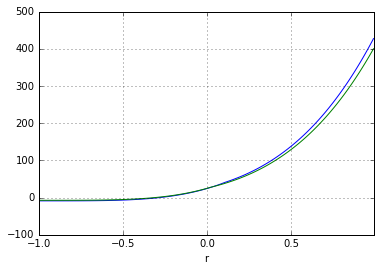

In [21]:
r_data.plot(kind='line', x='r', y=['værdi_pendk_stat', 'værdi_gs_stat'], legend=False)

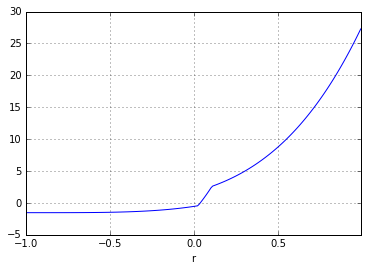

In [23]:
r_data.plot(kind='line', x='r', y='stat_forskel', legend=False)

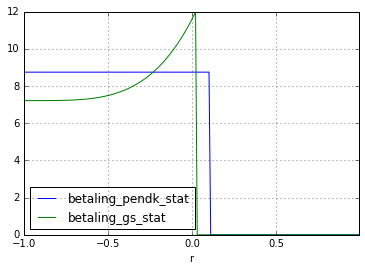

In [25]:
r_data.plot(kind='line', x='r', y=['betaling_pendk_stat', 'betaling_gs_stat'])

In [17]:
r_data.to_csv('r_data.csv')